In [4]:
import torch
from normalizing_flows import Flow
from normalizing_flows.architectures import RealNVP
import numpy as np
import matplotlib.pyplot as plt

In [2]:
torch.manual_seed(0)

n_data = 1000
n_dim = 3

x = torch.randn(n_data, n_dim)  # Generate some training data
bijection = RealNVP(n_dim)  # Create the bijection
flow = Flow(bijection)  # Create the normalizing flow

flow.fit(x)  # Fit the normalizing flow to training data
log_prob = flow.log_prob(x)  # Compute the log probability of training data
x_new = flow.sample(50)  # Sample 50 new data points

print(log_prob.shape)  # (100,)
print(x_new.shape)  # (50, 3)

torch.Size([1000])
torch.Size([50, 3])


In [ ]:
torch.manual_seed(0)

batch_shape = (5, 7)
event_shape = (2, 3)
x = torch.randn(size=(*batch_shape, *event_shape))
z = torch.randn(size=(*batch_shape, *event_shape))

bijection = RealNVP(event_shape=event_shape)
flow = Flow(bijection)

_, log_det_forward = flow.bijection.forward(x)
_, log_det_inverse = flow.bijection.inverse(z)

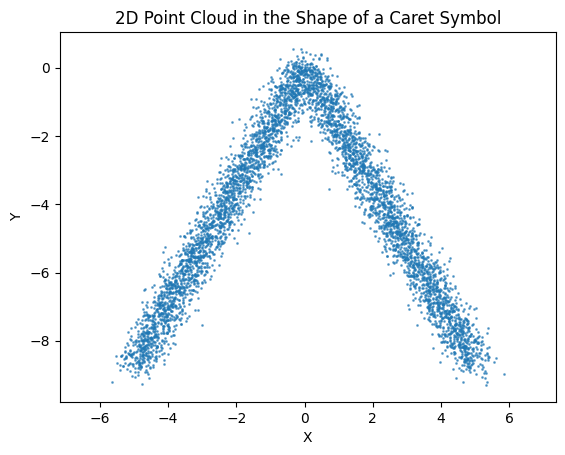

In [31]:
from shapes import caret
import matplotlib.pyplot as plt

# Parameters for the point cloud
line_length = 10  # length of each line of the caret
angle = np.pi / 3  # 45 degrees angle for the caret lines in radians
num_points = 5000  # total number of points to generate
std_dev = 0.3  # standard deviation for Gaussian noise

# Generate the point cloud
x_noisy, y_noisy = caret(line_length, angle, num_points, std_dev)

# Plot the noisy 2D point cloud
plt.scatter(x_noisy, y_noisy, alpha=0.6, s=1)
plt.title('2D Point Cloud in the Shape of a Caret Symbol')
plt.xlabel('X')
plt.ylabel('Y')
plt.axis('equal')
plt.show()


In [36]:
data = torch.tensor(np.stack([x_noisy, y_noisy], axis=1), dtype=torch.float32)

n_dim = 2
# Create the bijection and flow
bijection = RealNVP(n_dim)
flow = Flow(bijection)

# Fit the normalizing flow to training data
flow.fit(data)

# Compute the log probability of training data
log_prob = flow.log_prob(data)

# Sample new data points from the flow
x_new = flow.sample(50)

print(log_prob.shape)  # Should print the shape of log_prob, e.g., (1000,)
print(x_new.shape)  # Should print torch.Size([50, 2]), for 50 new 2D points

torch.Size([1000])
torch.Size([50, 2])


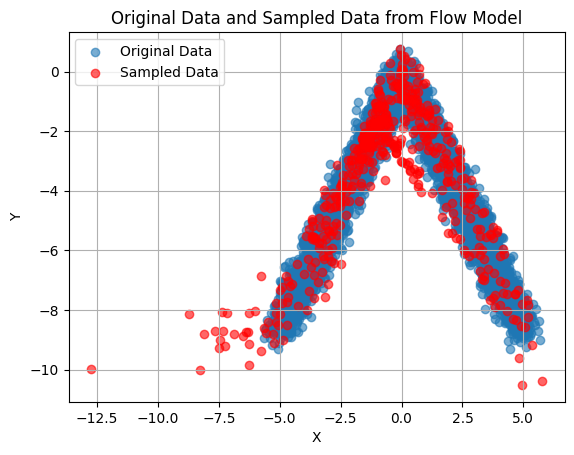

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import torch

# Assuming 'flow' is your trained flow model and 'data' is your original data

# Plot original data
plt.scatter(data[:, 0].numpy(), data[:, 1].numpy(), alpha=0.6, label='Original Data')

# Sample new data points from the flow
new_data = flow.sample(500).detach().numpy()

# Plot sampled data
plt.scatter(new_data[:, 0], new_data[:, 1], color='red', alpha=0.6, label='Sampled Data')

# Adding labels and title
plt.title('Original Data and Sampled Data from Flow Model')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.show()


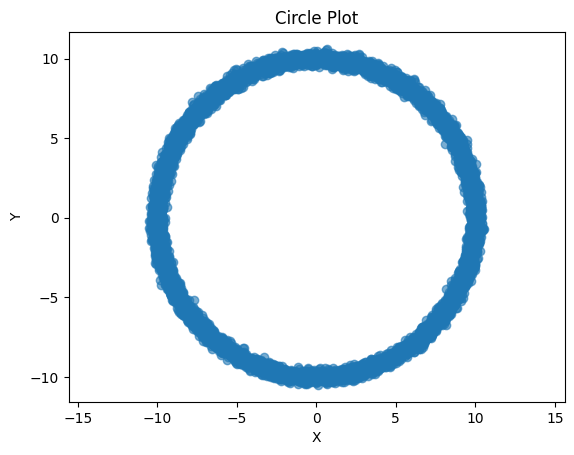

In [25]:
from shapes import generate_circular_data

scale = 4
x_, y_ = generate_circular_data(10**scale, 10, 0.2, seed=0)


# Assuming 'x_' and 'y_' are the coordinates of the circle points
plt.scatter(x_, y_, alpha=0.6)
plt.title('Circle Plot')
plt.xlabel('X')
plt.ylabel('Y')
plt.axis('equal')
plt.show()

In [26]:
data = torch.tensor(np.stack([x_, y_], axis=1), dtype=torch.float32)

n_dim = 2
# Create the bijection and flow
bijection = RealNVP(n_dim)
flow = Flow(bijection)

# Fit the normalizing flow to training data
flow.fit(data)

# Compute the log probability of training data
log_prob = flow.log_prob(data)

# Sample new data points from the flow
x_new = flow.sample(50)

print(log_prob.shape)  # Should print the shape of log_prob, e.g., (1000,)
print(x_new.shape)  # Should print torch.Size([50, 2]), for 50 new 2D points

torch.Size([10000])
torch.Size([50, 2])


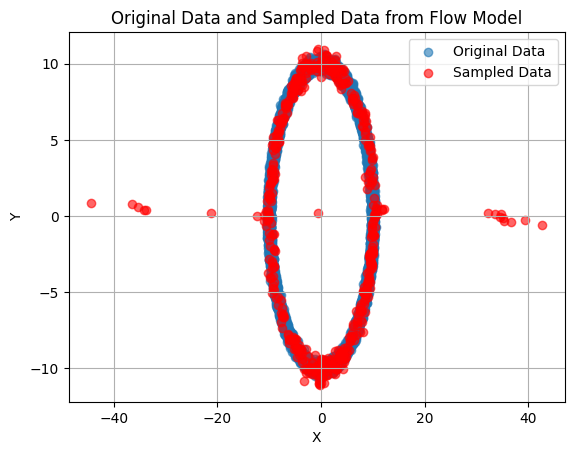

In [27]:
# Plot original data
plt.scatter(data[:, 0].numpy(), data[:, 1].numpy(), alpha=0.6, label='Original Data')

# Sample new data points from the flow
new_data = flow.sample(500).detach().numpy()

# Plot sampled data
plt.scatter(new_data[:, 0], new_data[:, 1], color='red', alpha=0.6, label='Sampled Data')

# Adding labels and title
plt.title('Original Data and Sampled Data from Flow Model')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.show()


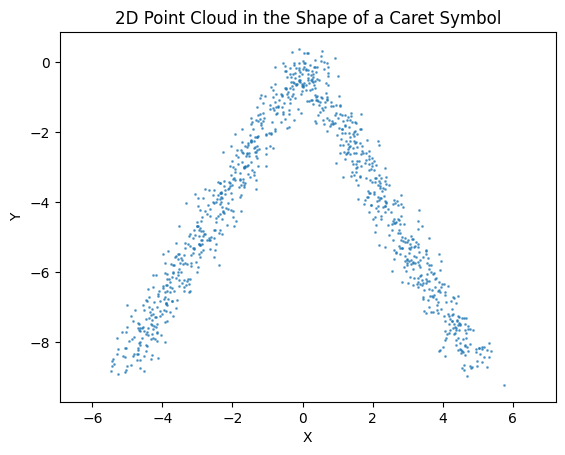

In [35]:
# generate a caret point cloud
from shapes import caret
import matplotlib.pyplot as plt

scale = 3

# Parameters for the point cloud
line_length = 10  # length of each line of the caret
angle = np.pi / 3  # 45 degrees angle for the caret lines in radians
num_points = 10**scale  # total number of points to generate
std_dev = 0.3  # standard deviation for Gaussian noise

# Generate the point cloud
x_noisy, y_noisy = caret(line_length, angle, num_points, std_dev, seed=0)

# Plot the noisy 2D point cloud
plt.scatter(x_noisy, y_noisy, alpha=0.6, s=1)
plt.title('2D Point Cloud in the Shape of a Caret Symbol')
plt.xlabel('X')
plt.ylabel('Y')
plt.axis('equal')
plt.show()

In [ ]:
flow.bijection(x)

In [ ]:
x = data[0].clone().detach().requires_grad_(True)
x

In [ ]:
import torch

# Assuming 'flow' is your fitted flow model

# Select a data point for which to compute the Jacobian
x = data[0].clone().detach().requires_grad_(True)

# Forward pass through the flow
output_tuple = flow.bijection(x)
transformed_data = output_tuple[0]  # Assuming the transformed data is the first element

# Initialize the Jacobian matrix
n_dim = transformed_data.shape[0]
jacobian = torch.zeros((n_dim, n_dim))

# Compute the Jacobian
for i in range(n_dim):
    # Reset gradients
    if x.grad is not None:
        x.grad.zero_()
    
    # Create a gradient vector with a 1 in the i-th position
    grad_output = torch.zeros_like(transformed_data)
    grad_output[i] = 1

    # Compute the gradient for the i-th output dimension
    transformed_data.backward(gradient=grad_output, retain_graph=True)
    
    # Store the gradient as the i-th row of the Jacobian
    jacobian[i] = x.grad

print(jacobian)


In [ ]:
transformed_data.backward(gradient=grad_output, retain_graph=True)

In [ ]:
x.grad

(tensor([[ -0.9118,  -5.2472],
        [ -0.9144,  -5.2633],
        [ -0.9170,  -5.2793],
        ...,
        [-10.7035,  14.8102],
        [-10.7039,  14.8467],
        [-10.7044,  14.8832]], grad_fn=<AddBackward0>), tensor([-9.5662e-01, -9.5274e-01, -9.4886e-01, -9.4498e-01, -9.4110e-01,
        -9.3722e-01, -9.3333e-01, -9.2944e-01, -9.2555e-01, -9.2165e-01,
        -9.1776e-01, -9.1386e-01, -9.0997e-01, -9.0607e-01, -9.0217e-01,
        -8.9827e-01, -8.9436e-01, -8.9046e-01, -8.8655e-01, -8.8265e-01,
        -8.7874e-01, -8.7484e-01, -8.7093e-01, -8.6702e-01, -8.6311e-01,
        -8.5920e-01, -8.5529e-01, -8.5139e-01, -8.4748e-01, -8.4357e-01,
        -8.3966e-01, -8.3575e-01, -8.3184e-01, -8.2794e-01, -8.2403e-01,
        -8.2012e-01, -8.1622e-01, -8.1231e-01, -8.0841e-01, -8.0450e-01,
        -8.0060e-01, -7.9670e-01, -7.9280e-01, -7.8890e-01, -7.8500e-01,
        -7.8111e-01, -7.7721e-01, -7.7332e-01, -7.6943e-01, -7.6553e-01,
        -7.6165e-01, -7.5776e-01, -7.5387e-01, -7.

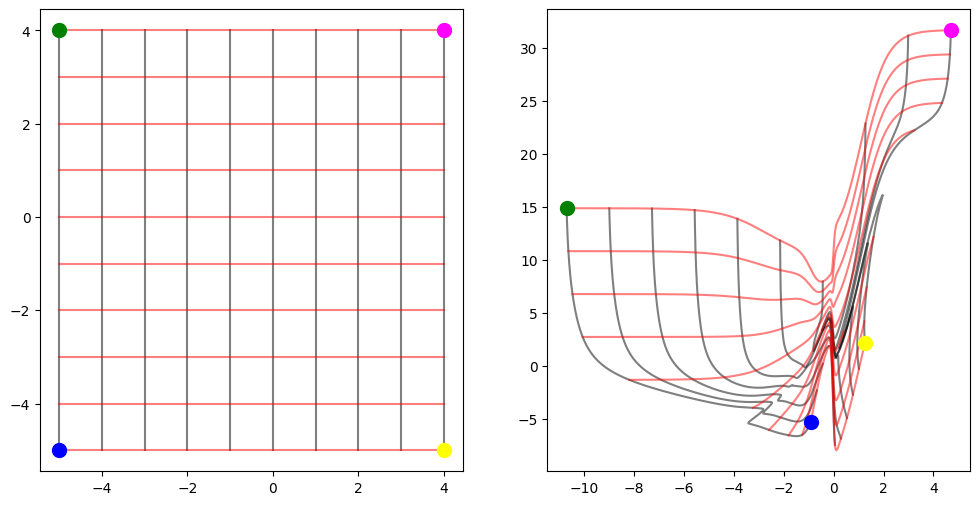

In [34]:
# Define parameters
x_range = range(-5, 5)  # Range of values to cover in x coordinates
y_range = range(-5, 5)  # Range of values to cover in y coordinates

transformed = []

# create 2 seperate plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,6))

for x in x_range:
    # generate a line of points along the y-axis at x
    y = torch.linspace(y_range[0], y_range[-1], 1000)
    x_plt = torch.ones_like(y) * x
    
    # plot the line on the first plot
    ax1.plot(x_plt, y, color='black', alpha=0.5)

    # transform the line using the flow
    grid_points = torch.stack((x_plt, y), dim=1)
    transformed_points = flow.bijection(grid_points)

    if x == x_range[0]:
        print(transformed_points)

    # revert transformed_points to numpy array
    transformed_points = transformed_points[0].detach().numpy()
    transformed.append(transformed_points)

    # plot the transformed line on the second plot
    ax2.plot(transformed_points[:,0], transformed_points[:,1], color='black', alpha=0.5)

# add grid of y dircetion too but on same plots
for y in y_range:
    # generate a line of points along the x-axis at y
    x = torch.linspace(x_range[0], x_range[-1], 1000)
    y_plt = torch.ones_like(x) * y
    
    # plot the line on the first plot
    ax1.plot(x, y_plt, color='red', alpha=0.5)

    # transform the line using the flow
    grid_points = torch.stack((x, y_plt), dim=1)
    transformed_points = flow.bijection(grid_points)

    # revert transformed_points to numpy array
    transformed_points = transformed_points[0].detach().numpy()
    transformed.append(transformed_points)

    # plot the transformed line on the second plot
    ax2.plot(transformed_points[:,0], transformed_points[:,1], color='red', alpha=0.5)

# Define the corner points
corner_points = [
    (min(x_range), min(y_range)),
    (min(x_range), max(y_range)),
    (max(x_range), min(y_range)),
    (max(x_range) , max(y_range))
]

# Colors for the corners
colors = ['blue', 'green', 'yellow', 'magenta']

for i, (x, y) in enumerate(corner_points):
    # Convert to tensor
    corner_tensor = torch.tensor([[x, y]], dtype=torch.float32)

    # Transform the corner point using the flow
    transformed_corner = flow.bijection(corner_tensor)

    # Revert to numpy array
    transformed_corner = transformed_corner[0].detach().numpy()

    # Plot original corner point
    ax1.plot(x, y, 'o', markersize=10, color=colors[i])

    # Plot transformed corner point
    ax2.plot(transformed_corner[0, 0], transformed_corner[0, 1], 'o', markersize=10, color=colors[i])

plt.show()

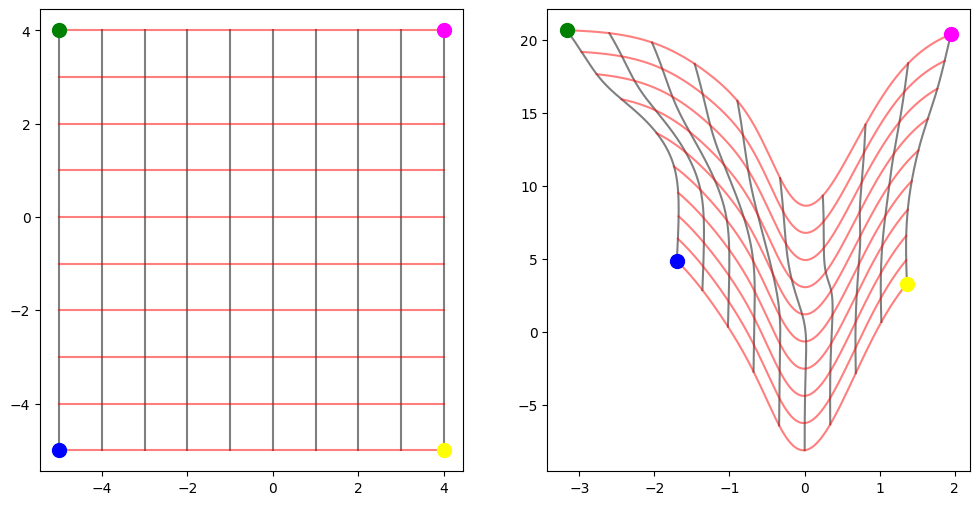

In [38]:
# Define parameters
x_range = range(-5, 5)  # Range of values to cover in x coordinates
y_range = range(-5, 5)  # Range of values to cover in y coordinates

transformed = []

# create 2 seperate plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,6))

for x in x_range:
    # generate a line of points along the y-axis at x
    y = torch.linspace(y_range[0], y_range[-1], 1000)
    x_plt = torch.ones_like(y) * x
    
    # plot the line on the first plot
    ax1.plot(x_plt, y, color='black', alpha=0.5)

    # transform the line using the flow
    grid_points = torch.stack((x_plt, y), dim=1)
    transformed_points = flow.bijection(grid_points)

    # revert transformed_points to numpy array
    transformed_points = transformed_points[0].detach().numpy()
    transformed.append(transformed_points)

    # plot the transformed line on the second plot
    ax2.plot(transformed_points[:,0], transformed_points[:,1], color='black', alpha=0.5)

# add grid of y dircetion too but on same plots
for y in y_range:
    # generate a line of points along the x-axis at y
    x = torch.linspace(x_range[0], x_range[-1], 1000)
    y_plt = torch.ones_like(x) * y
    
    # plot the line on the first plot
    ax1.plot(x, y_plt, color='red', alpha=0.5)

    # transform the line using the flow
    grid_points = torch.stack((x, y_plt), dim=1)
    transformed_points = flow.bijection(grid_points)

    # revert transformed_points to numpy array
    transformed_points = transformed_points[0].detach().numpy()
    transformed.append(transformed_points)

    # plot the transformed line on the second plot
    ax2.plot(transformed_points[:,0], transformed_points[:,1], color='red', alpha=0.5)

# Define the corner points
corner_points = [
    (min(x_range), min(y_range)),
    (min(x_range), max(y_range)),
    (max(x_range), min(y_range)),
    (max(x_range) , max(y_range))
]

# Colors for the corners
colors = ['blue', 'green', 'yellow', 'magenta']

for i, (x, y) in enumerate(corner_points):
    # Convert to tensor
    corner_tensor = torch.tensor([[x, y]], dtype=torch.float32)

    # Transform the corner point using the flow
    transformed_corner = flow.bijection(corner_tensor)

    # Revert to numpy array
    transformed_corner = transformed_corner[0].detach().numpy()

    # Plot original corner point
    ax1.plot(x, y, 'o', markersize=10, color=colors[i])

    # Plot transformed corner point
    ax2.plot(transformed_corner[0, 0], transformed_corner[0, 1], 'o', markersize=10, color=colors[i])

plt.show()